In [1]:
import numpy as np

# 模拟原始图像（这里简单用灰度图示意）
original_image = np.random.randint(0, 256, size=(200, 200))
# 模拟真实标签（Ground Truth），简单创建一个圆形区域作为分割目标
x, y = np.indices((200, 200))
gt_mask = ((x - 100) ** 2 + (y - 100) ** 2 < 50**2).astype(int)
# 模拟预测分割结果（这里随机生成一个近似的分割）
pred_mask = np.random.randint(0, 2, size=(200, 200))

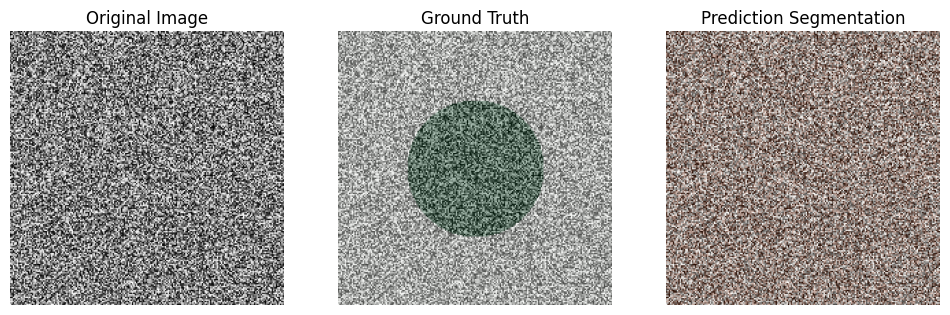

In [2]:
import matplotlib.pyplot as plt

# 设置图像布局
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# 绘制原始图像
axs[0].imshow(original_image, cmap="gray")
axs[0].set_title("Original Image")
axs[0].axis("off")

# 绘制真实标签（Ground Truth），用绿色覆盖显示
axs[1].imshow(original_image, cmap="gray")
axs[1].imshow(gt_mask, cmap="Greens", alpha=0.3)
axs[1].set_title("Ground Truth")
axs[1].axis("off")

# 绘制预测分割结果（Prediction Segmentation），用黄色覆盖显示
axs[2].imshow(original_image, cmap="gray")
axs[2].imshow(pred_mask, cmap="Oranges", alpha=0.3)
axs[2].set_title("Prediction Segmentation")
axs[2].axis("off")

plt.show()

ValueError: Invalid RGBA argument: 'YlOrBr'

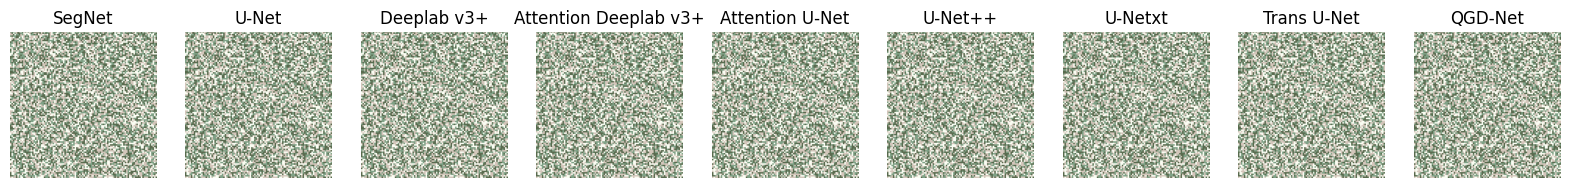

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 假设这里有9个模型的名称
model_names = [
    "SegNet",
    "U-Net",
    "Deeplab v3+",
    "Attention Deeplab v3+",
    "Attention U-Net",
    "U-Net++",
    "U-Netxt",
    "Trans U-Net",
    "QGD-Net",
]

# 生成模拟的预测分割数据（这里简单生成一个随机的二值掩码图像作为示例）
# 实际应用中应该替换为真实的分割结果数据
prediction_mask = np.random.randint(0, 2, size=(100, 100))  # 100x100的掩码图像
# 生成模拟的真实标注数据（同样是随机二值掩码图像示例）
ground_truth_mask = np.random.randint(0, 2, size=(100, 100))

# 设置图形大小
plt.figure(figsize=(20, 5))

# 遍历模型名称，绘制每个模型对应的预测分割和真实标注
for i, model_name in enumerate(model_names):
    ax = plt.subplot(1, len(model_names), i + 1)
    # 绘制预测分割结果（用黄色表示）
    ax.imshow(prediction_mask, cmap="YlOrBr", alpha=0.5)
    # 绘制真实标注（用绿色表示）
    ax.imshow(ground_truth_mask, cmap="Greens", alpha=0.5)
    ax.set_title(model_name)
    ax.axis("off")

# 添加图例
handles = [
    plt.Rectangle((0, 0), 1, 1, color="YlOrBr", alpha=0.5),
    plt.Rectangle((0, 0), 1, 1, color="Greens", alpha=0.5),
]
labels = ["Prediction Segmentation", "Ground Truth"]
plt.legend(handles, labels, loc="upper left")

# 显示图形
plt.show()

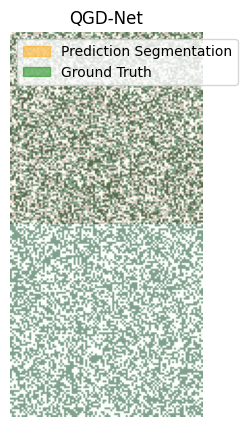

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model_names = [
    "QGD-Net",
]

plt.figure(figsize=(20, 5))
for i, model_name in enumerate(model_names):
    ax = plt.subplot(1, len(model_names), i + 1)
    # 正确使用颜色映射表绘制预测分割结果
    ax.imshow(prediction_mask, cmap="YlOrBr", alpha=0.5)
    # 正确使用颜色映射表绘制真实标注
    ax.imshow(ground_truth_mask, cmap="Greens", alpha=0.5)
    ax.set_title(model_name)
    ax.axis("off")

handles = [
    plt.Rectangle((0, 0), 1, 1, color="orange", alpha=0.5),  # 用具体颜色指定图例颜色
    plt.Rectangle((0, 0), 1, 1, color="green", alpha=0.5),
]
labels = ["Prediction Segmentation", "Ground Truth"]
plt.legend(handles, labels, loc="upper left")
plt.show()

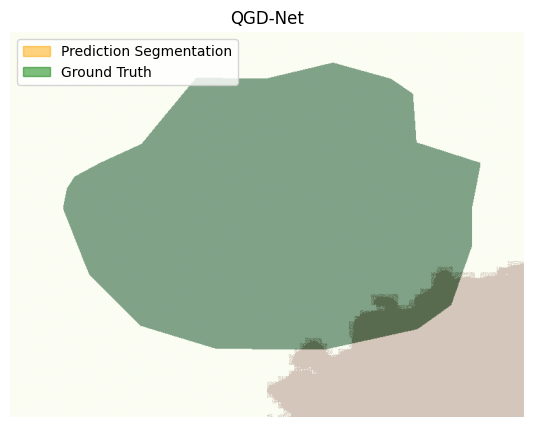

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image  # 用于读取图像数据，可按需替换为cv2等库

# 假设这里有9个模型的名称
model_names = [
    "QGD-Net",
]


# 定义函数用于读取图像数据，这里以PIL库为例，可根据实际情况调整
def read_image_mask(path, resize=False):
    img = Image.open(path)
    if resize:
        img = img.resize((int(img.size[0] * 0.5), int(img.size[1] * 0.5)))
    img_array = np.array(img)
    if (
        len(img_array.shape) == 3 and img_array.shape[2] == 3
    ):  # 如果是RGB图像，转换为灰度
        img_array = np.dot(img_array[..., :3], [0.2989, 0.5870, 0.1140])
    img_array = (img_array > 0).astype(np.uint8)  # 转换为二值图像
    return img_array


def read_image(path):
    return np.array(Image.open(path))


# 读取预测分割掩码和真实标注掩码图像数据，需替换为实际路径
prediction_mask_path = (
    "/home/zhrdai/projects/Pytorch-UNet/output.jpg"  # 预测分割掩码图像路径
)
ground_truth_mask_path = "/home/zhrdai/projects/Pytorch-UNet/data/isic2017/masks/ISIC_0000022_segmentation.png"
original_image_path = (
    "/home/zhrdai/projects/Pytorch-UNet/data/isic2016/imgs/ISIC_0000044.jpg"
)
# original_image = read_image(original_image_path)  # 真实标注掩码图像路径÷
prediction_mask = read_image_mask(prediction_mask_path)
ground_truth_mask = read_image_mask(ground_truth_mask_path, resize=True)

# 设置图形大小
plt.figure(figsize=(20, 5))

# 遍历模型名称，绘制每个模型对应的预测分割和真实标注
for i, model_name in enumerate(model_names):
    ax = plt.subplot(1, len(model_names), i + 1)
    # ax.imshow(original_image)
    # 绘制预测分割结果（用黄色表示）
    ax.imshow(prediction_mask, cmap="YlOrBr", alpha=0.5)
    # 绘制真实标注（用绿色表示）
    ax.imshow(ground_truth_mask, cmap="Greens", alpha=0.5)
    ax.set_title(model_name)
    ax.axis("off")

# 添加图例
handles = [
    plt.Rectangle((0, 0), 1, 1, color="orange", alpha=0.5),
    plt.Rectangle((0, 0), 1, 1, color="green", alpha=0.5),
]
labels = ["Prediction Segmentation", "Ground Truth"]
plt.legend(handles, labels, loc="upper left")

# 显示图形
plt.show()

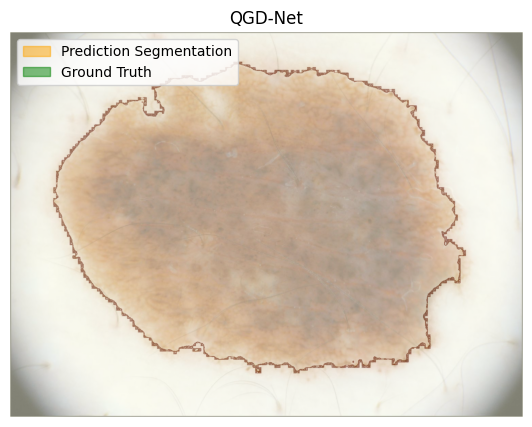

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image  # 用于读取图像数据，可按需替换为cv2等库
from scipy import ndimage

# 假设这里有9个模型的名称
model_names = [
    "QGD-Net",
]


# 定义函数用于读取图像数据，这里以PIL库为例，可根据实际情况调整
def read_image_mask(path):
    img = Image.open(path)
    img_array = np.array(img)
    if (
        len(img_array.shape) == 3 and img_array.shape[2] == 3
    ):  # 如果是RGB图像，转换为灰度
        img_array = np.dot(img_array[..., :3], [0.2989, 0.5870, 0.1140])
    img_array = (img_array > 0).astype(np.uint8)  # 转换为二值图像
    return img_array


def read_image(path):
    return np.array(Image.open(path))


# 边缘检测函数
def detect_edges(mask):
    # 使用sobel算子进行边缘检测
    sx = ndimage.sobel(mask, axis=0, mode="constant")
    sy = ndimage.sobel(mask, axis=1, mode="constant")
    edges = np.hypot(sx, sy)
    edges = (edges > 0).astype(np.uint8)
    return edges


# 读取预测分割掩码和真实标注掩码图像数据，需替换为实际路径
prediction_mask_path = (
    "/home/zhrdai/projects/Pytorch-UNet/output.jpg"  # 预测分割掩码图像路径
)
ground_truth_mask_path = "/home/zhrdai/projects/Pytorch-UNet/data/isic2016/masks/ISIC_0000044_Segmentation.png"
original_image_path = (
    "/home/zhrdai/projects/Pytorch-UNet/data/isic2016/imgs/ISIC_0000044.jpg"
)
original_image = read_image(original_image_path)  # 真实标注掩码图像路径
prediction_mask = read_image_mask(prediction_mask_path)
ground_truth_mask = read_image_mask(ground_truth_mask_path)

# 进行边缘检测
prediction_edges = detect_edges(prediction_mask)
ground_truth_edges = detect_edges(ground_truth_mask)

# 设置图形大小
plt.figure(figsize=(20, 5))

# 遍历模型名称，绘制每个模型对应的预测分割和真实标注
for i, model_name in enumerate(model_names):
    ax = plt.subplot(1, len(model_names), i + 1)
    ax.imshow(original_image)
    # 绘制预测分割结果（用黄色表示）
    ax.imshow(prediction_edges, cmap="YlOrBr", alpha=0.5)
    # 绘制真实标注（用绿色表示）
    # ax.imshow(ground_truth_edges, cmap="Greens", alpha=0.5)
    ax.set_title(model_name)
    ax.axis("off")

# 添加图例
handles = [
    plt.Rectangle((0, 0), 1, 1, color="orange", alpha=0.5),
    plt.Rectangle((0, 0), 1, 1, color="green", alpha=0.5),
]
labels = ["Prediction Segmentation", "Ground Truth"]
plt.legend(handles, labels, loc="upper left")

# 显示图形
plt.show()

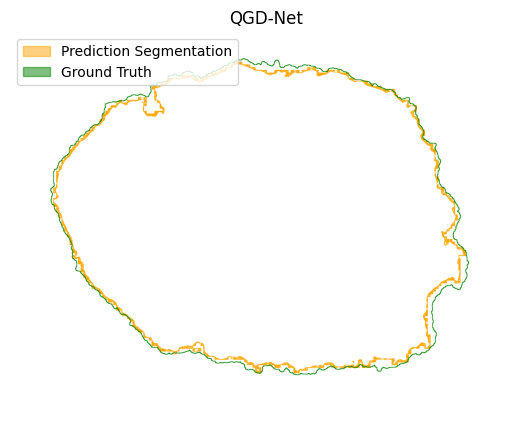

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image  # 用于读取图像数据，可按需替换为cv2等库
from scipy import ndimage


# 假设这里有9个模型的名称
model_names = [
    "QGD-Net",
]


# 定义函数用于读取图像数据，这里以PIL库为例，可根据实际情况调整
def read_image_mask(path):
    img = Image.open(path)
    img_array = np.array(img)
    if (
        len(img_array.shape) == 3 and img_array.shape[2] == 3
    ):  # 如果是RGB图像，转换为灰度
        img_array = np.dot(img_array[..., :3], [0.2989, 0.5870, 0.1140])
    img_array = (img_array > 0).astype(np.uint8)  # 转换为二值图像
    return img_array


def read_image(path):
    return np.array(Image.open(path))


# 边缘检测函数
def detect_edges(mask):
    # 使用sobel算子进行边缘检测
    sx = ndimage.sobel(mask, axis=0, mode="constant")
    sy = ndimage.sobel(mask, axis=1, mode="constant")
    edges = np.hypot(sx, sy)
    edges = (edges > 0).astype(np.uint8)
    return edges


# 将边缘图像转换为带有透明度通道的图像
def make_edges_transparent(edges, rgb):
    rgba = np.zeros((edges.shape[0], edges.shape[1], 4), dtype=np.uint8)
    rgba[:, :, 0] = rgb[0]  # 这里设置为白色，可根据需要修改颜色
    rgba[:, :, 1] = rgb[1]
    rgba[:, :, 2] = rgb[2]
    rgba[:, :, 3] = edges * 255  # 非边缘部分透明度为0，边缘部分透明度为255
    return rgba


# 读取预测分割掩码和真实标注掩码图像数据，需替换为实际路径
prediction_mask_path = (
    "/home/zhrdai/projects/Pytorch-UNet/output.jpg"  # 预测分割掩码图像路径
)
ground_truth_mask_path = "/home/zhrdai/projects/Pytorch-UNet/data/isic2016/masks/ISIC_0000044_Segmentation.png"
original_image_path = (
    "/home/zhrdai/projects/Pytorch-UNet/data/isic2016/imgs/ISIC_0000044.jpg"
)
original_image = read_image(original_image_path)  # 真实标注掩码图像路径
prediction_mask = read_image_mask(prediction_mask_path)
ground_truth_mask = read_image_mask(ground_truth_mask_path)

# 进行边缘检测
prediction_edges = detect_edges(prediction_mask)
ground_truth_edges = detect_edges(ground_truth_mask)

# 转换为带有透明度通道的图像
prediction_edges_rgba = make_edges_transparent(prediction_edges, (255, 165, 0))
ground_truth_edges_rgba = make_edges_transparent(
    ground_truth_edges,
    (0, 128, 0),
)

# 设置图形大小
plt.figure(figsize=(20, 5))

# 遍历模型名称，绘制每个模型对应的预测分割和真实标注
for i, model_name in enumerate(model_names):
    ax = plt.subplot(1, len(model_names), i + 1)
    # ax.imshow(original_image)
    # 绘制预测分割结果（用黄色表示）
    ax.imshow(prediction_edges_rgba, alpha=1)
    # 绘制真实标注（用绿色表示）
    ax.imshow(ground_truth_edges_rgba, alpha=1)
    ax.set_title(model_name)
    ax.axis("off")

# 添加图例
handles = [
    plt.Rectangle((0, 0), 1, 1, color="orange", alpha=0.5),
    plt.Rectangle((0, 0), 1, 1, color="green", alpha=0.5),
]
labels = ["Prediction Segmentation", "Ground Truth"]
plt.legend(handles, labels, loc="upper left")

# 显示图形
plt.show()

In [70]:
prediction_edges.shape

(960, 999)

In [13]:
import torch
from qgd_net import QGDNet

In [32]:
net = QGDNet(n_channels=4, n_classes=2, bilinear=False)

In [37]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


net.to(device=device)
state_dict = torch.load(
    "/home/zhrdai/projects/Pytorch-UNet/checkpoints/isic2016/checkpoint_epoch5.pth",
    map_location=device,
)
mask_values = state_dict.pop("mask_values", [0, 1])
net.load_state_dict(state_dict)

<All keys matched successfully>

In [38]:
num_parameters = sum(p.numel() for p in net.parameters())

In [39]:
num_parameters

9858178

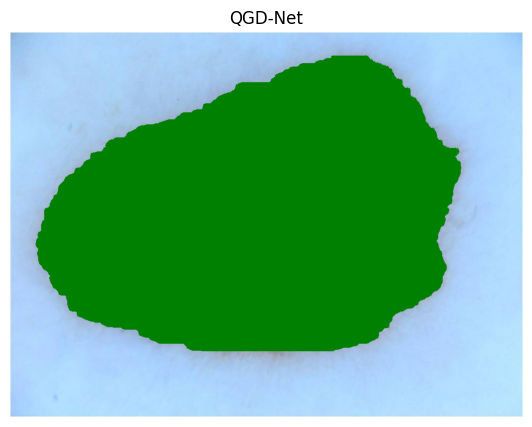

In [84]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw

# 假设这里有9个模型的名称
model_names = [
    # "SegNet",
    # "U-Net",
    # "Deeplab v3+",
    # "Attention Deeplab v3+",
    # "Attention U-Net",
    # "U-Net++",
    # "U-Netxt",
    # "Trans U-Net",
    "QGD-Net",
]


# 定义函数用于读取图像数据
def read_image(path):
    return np.array(Image.open(path))


# 定义函数用于获取轮廓点（简单的边缘检测，这里采用二值图像寻找非零像素边界点）
def get_contour_points(mask):
    contour_points = []
    rows, cols = mask.shape
    for r in range(rows):
        for c in range(cols):
            if mask[r, c] > 0:
                if (
                    (r == 0 or mask[r - 1, c] == 0)
                    or (r == rows - 1 or mask[r + 1, c] == 0)
                    or (c == 0 or mask[r, c - 1] == 0)
                    or (c == cols - 1 or mask[r, c + 1] == 0)
                ):
                    contour_points.append((c, r))
    return contour_points


# 读取原始图像、预测分割掩码和真实标注掩码图像数据，需替换为实际路径
original_image_path = (
    "/home/zhrdai/projects/Pytorch-UNet/data/isic2016/imgs/ISIC_0000000.jpg"
)
prediction_mask_path = "output.jpg"
ground_truth_mask_path = "/home/zhrdai/projects/Pytorch-UNet/data/isic2016/masks/ISIC_0000000_Segmentation.png"
original_image = read_image(original_image_path)
prediction_mask = read_image(prediction_mask_path)
ground_truth_mask = read_image(ground_truth_mask_path)

# 如果掩码图像是彩色的，转换为灰度
if len(prediction_mask.shape) == 3 and prediction_mask.shape[2] == 3:
    prediction_mask = np.dot(prediction_mask[..., :3], [0.2989, 0.5870, 0.1140])
if len(ground_truth_mask.shape) == 3 and ground_truth_mask.shape[2] == 3:
    ground_truth_mask = np.dot(ground_truth_mask[..., :3], [0.2989, 0.5870, 0.1140])

# 转换为二值图像
prediction_mask = (prediction_mask > 0).astype(np.uint8)
ground_truth_mask = (ground_truth_mask > 0).astype(np.uint8)

# 设置图形大小
plt.figure(figsize=(20, 5))

# 遍历模型名称，绘制每个模型对应的结果
for i, model_name in enumerate(model_names):
    ax = plt.subplot(1, len(model_names), i + 1)
    ax.imshow(original_image)  # 先绘制原始图像

    # 获取预测分割掩码的轮廓点
    prediction_contour_points = get_contour_points(prediction_mask)
    # 使用PIL的ImageDraw绘制预测分割轮廓（这里只是简单示例，可调整颜色等参数）
    pil_image = Image.fromarray(original_image)
    draw = ImageDraw.Draw(pil_image)
    draw.line(prediction_contour_points, fill="orange", width=2)
    ax.imshow(np.array(pil_image))

    # 获取真实标注掩码的轮廓点
    ground_truth_contour_points = get_contour_points(ground_truth_mask)
    # 使用PIL的ImageDraw绘制真实标注轮廓
    pil_image = Image.fromarray(original_image)
    draw = ImageDraw.Draw(pil_image)
    draw.line(ground_truth_contour_points, fill="green", width=2)
    ax.imshow(np.array(pil_image))

    ax.set_title(model_name)
    ax.axis("off")

# 显示图形
plt.show()